# A textile company regularly spent money on five advertising companies for their ads.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading the dataset

In [35]:
data=pd.read_csv('Add_sales_data_2018.csv')

# Preparing the dataset

In [36]:
data.shape

(205, 7)

In [37]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [39]:
#Checking the null values
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

# 1. Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [40]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
data.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


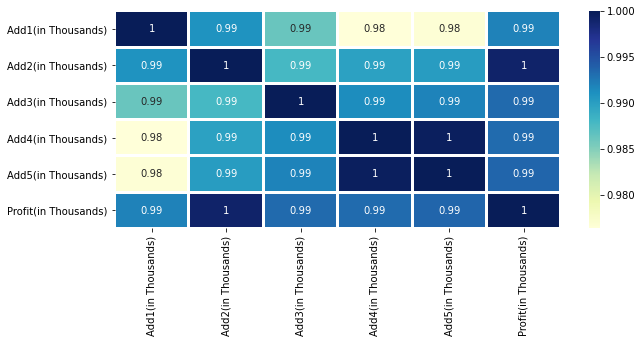

In [43]:
corr_mat=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corr_mat,annot=True,linewidth=2,cmap='YlGnBu');

# The amount spent for advertising through five different companies and profit generated are highly correlated.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [44]:
y=data['Profit(in Thousands)']
x=data.drop(['Profit(in Thousands)',('Date')],axis=1)

In [45]:
x.shape

(205, 5)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [47]:
from sklearn import linear_model
lin_reg=linear_model.LinearRegression()

In [48]:
model=lin_reg.fit(x_train,y_train)

In [49]:
predictions=model.predict(x_test)

In [50]:
from sklearn.metrics import mean_squared_error
print('MSE IS: \n',mean_squared_error(y_test,predictions))

MSE IS: 
 8.11273293080854e-25


# We get a very low error value so we could say that our regression model is good.

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
Add1(in Thousands) =290,
Add2(in Thousands) =312,
Add3(in Thousands) =309,
Add4(in Thousands) =298,
Add5(in Thousands) =320.

In [51]:
x.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90


In [52]:
make_pred=[[290,312,309,298,320]]
model.predict(make_pred).item()

5820.0599999999995

# So the predicted profit is almost near to the average profit.